# Keras CIFAR10をCNNで分類

この論文のAll-CNN-Cをやってみた
http://arxiv.org/pdf/1412.6806.pdf

In [ ]:
# https://gist.github.com/juntaki/e50200c82d6f3a5143e7b206a0ab2451
# https://github.com/NervanaSystems/neon/blob/master/examples/cifar10_allcnn.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import *
from sklearn import datasets, preprocessing
from keras.regularizers import l2
import keras as keras

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2652: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [2]:
batch_size = 32
nb_classes = 10
nb_epoch = 10
data_augmentation = True

# input image dimensions
img_rows, img_cols = 32, 32
# the CIFAR10 images are RGB
img_channels = 3

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes) 

('X_train shape:', (50000, 3, 32, 32))
(50000, 'train samples')
(10000, 'test samples')


array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

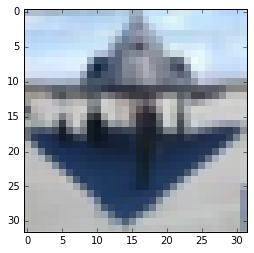

In [3]:
number = 404
img = X_train[number].reshape(3,32,32)
img1 = np.rollaxis(img, 0 ,3)
img1.shape
plt.imshow(img1, interpolation='none')
Y_train[number]

In [18]:
# using-learning-rate-schedules-deep-learning-models-python-keras/
# http://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/

# make model
def make_model_xavier_init():
  model = Sequential()
  model.add(Dropout(0.2, input_shape=(3, 32, 32)))
  model.add(Convolution2D(96, 3, 3, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal" ))
  model.add(Activation('relu'))
  model.add(Convolution2D(96, 3, 3, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Convolution2D(96, 3, 3, border_mode="same", subsample=(2,2), W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 3, 3, border_mode="same", subsample=(2,2), W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 1, 1, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(Convolution2D(10, 1, 1, border_mode="same", W_regularizer=l2(0.001), init="glorot_normal"))
  model.add(Activation('relu'))
  model.add(AveragePooling2D(pool_size=(8, 8), border_mode='valid'))
  model.add(Flatten())
  model.add(Activation("softmax"))
  return model

def make_model_temp():
  model = Sequential()
  model.add(Dropout(0.2, input_shape=(3, 32, 32)))
  model.add(Convolution2D(96, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(96, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(96, 3, 3, border_mode="same", subsample=(2,2), W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 3, 3, border_mode="same", subsample=(2,2), W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Convolution2D(192, 3, 3, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(192, 1, 1, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(Convolution2D(10, 1, 1, border_mode="same", W_regularizer=l2(0.001)))
  model.add(Activation('relu'))
  model.add(AveragePooling2D(pool_size=(8, 8), border_mode='valid'))
  model.add(Flatten())
  model.add(Activation("softmax"))
  return model


def make_detagen ():
  datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          width_shift_range=0.,  # randomly shift images horizontally (fraction of total width)
          height_shift_range=0.,  # randomly shift images vertically (fraction of total height)
          horizontal_flip=False,  # randomly flip images
          vertical_flip=False)  # randomly flip images

  datagen.fit(X_train)
  return datagen


In [ ]:

# learning rate schedule
def lr_decay_schedule(epoch):
  if (epoch == 0 or epoch == 200 or epoch == 250 or epoch == 300):
    print "epoch:" , epoch
  if (epoch < 200):
    return 0.01
  elif (epoch < 250):
    return 0.001
  elif (epoch < 300):
    return 0.0001
  return 0.00001

def test1():
  """
  # time based decay
  # Compile model
  epochs = 50
  learning_rate = 0.1
  decay_rate = learning_rate / epochs
  momentum = 0.8
  sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
  """

  # Make model
  model = make_model_xavier_init()
  #model = make_model_temp()

  # Compile model
  #sgd = SGD(lr=0.01, momentum=0.9)
  sgd = SGD()
  model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
  return model

# create model
model1 = test1()
model1.summary()
# learning schedule callback
lrate = keras.callbacks.LearningRateScheduler(lr_decay_schedule)
callbacks_list = [lrate]
# Fit the model
datagen1 = make_detagen()
model1.fit_generator(datagen1.flow(X_train, Y_train, batch_size=batch_size),
                      samples_per_epoch=X_train.shape[0],
                      nb_epoch=350,
                      callbacks = callbacks_list,               # learning schedule callback
                      validation_data=(X_test, Y_test))


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dropout_37 (Dropout)             (None, 3, 32, 32)     0           dropout_input_13[0][0]           
____________________________________________________________________________________________________
convolution2d_109 (Convolution2D)(None, 96, 32, 32)    2688        dropout_37[0][0]                 
____________________________________________________________________________________________________
activation_121 (Activation)      (None, 96, 32, 32)    0           convolution2d_109[0][0]          
____________________________________________________________________________________________________
convolution2d_110 (Convolution2D)(None, 96, 32, 32)    83040       activation_121[0][0]             
___________________________________________________________________________________________